# Mushrooms challenge

Each autumn, in Catalonia, there is a big competition about mushroom hunting. Unfortunately, during the past years, a lot of people have picked poisonous mushrooms thinking that they were edible, causing an overload on the healthcare system.

The Department of Health has asked to develop a model that given basic image attributes of mushrooms we can detect if it is poisonous or not, and give a guidance if which are the features most indicative of a poisonous mushroom.

## 1.&nbsp;Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

## 2.&nbsp; Read in, manipulate and split data

In [ ]:
# url = "https://drive.google.com/file/d/1Op1vQftBKN1lrPVGGLJU-UOlv_dScTup/view?usp=sharing"

url = "https://drive.google.com/file/d/1eT8uTctwIx9yu2m207ZD1zSfshT9B24k/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
mush = pd.read_csv(path, index_col='Id')

In [ ]:
mush.head()

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,poisonous
Id,,,,,,,
6573,k,e,False,w,w,v,1
4426,f,e,True,p,w,y,0
7018,b,w,False,w,w,s,0
5789,k,g,False,w,w,n,0
6187,f,n,True,p,g,v,0


In [ ]:
X = mush.copy()
y = X.pop("poisonous")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

X_train.head()

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population
Id,,,,,,
517,f,g,True,w,p,y
1105,f,g,True,g,g,v
3875,x,y,False,p,b,y
2595,f,c,False,w,n,v
3644,x,g,True,g,w,v


## 3.&nbsp; Create pipeline

We chose the `RandomForestClassifier()` as our model but you can try any other classifier.

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(handle_unknown="infrequent_if_exist",sparse_output=False),
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
)

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(handle_unknown="infrequent_if_exist",sparse_output=False),
    RandomForestClassifier(n_estimators=500, random_state=123)
)

In [ ]:
pipe.fit(X_train, y_train)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [ ]:
pipe.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_true=y_test, y_pred=pipe.predict(X_test))

0.9584615384615385

- A bit better than 95% Accuracy.
- That means, only 5 out of 100 mushrooms are wrongly labeled.
- "Wrongly labeled" can be two cases:
     - A poisonous mushroom got classified as non-poisonous or
     - a non-poisonous mushroom got classified as poisonous.

**Are both cases equally dangerous?**

Let's plot the confusion matrix to see how well our model performed.

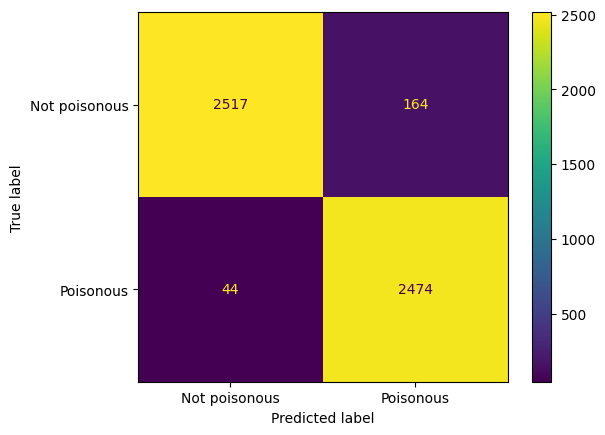

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train, display_labels=["Not poisonous", "Poisonous"]);

The confusion matrix shows that our model predicted 44 False Negatives. This means that 44 mushrooms will be predicted as non-poisonous (= Negatives) while in fact, they truly are poisonous (= False Negatives).

Our task is to avoid these situations at all costs, so we need to find a way to make that left-bottom corner of the confusion matrix to be equal to 0.

> Note: Judging from the values in the confusion matrix, the overall accuracy seems to be pretty high. As you can see from this example though, there are cases in which the accuracy doesn't seem to be the right metric to tell whether a model performs well (enough). This is why you'll need `recall`-measure for todays' competition:  

**Recall is the ability of the classifier to find all the positive samples.**

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_true=y_test, y_pred=pipe.predict(X_test))

0.9874804381846636

With a recall score of 1, no poisonous mushroom will be classified as non-poisonous (which means there are no false-negatives) --> no person will die.

## Part II: Competition submission with unseen data

In [ ]:
# import data
url = "https://drive.google.com/file/d/1eWxV9FGj6D-YnMsv4mHMWRcGIKbjrXYL/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
new_data = pd.read_csv(path, index_col='Id')

In [ ]:
# columns are in a different order, so let's change that
order_of_columns = X.columns.to_list()
new_data = new_data[order_of_columns]

In [ ]:
# predict values
poisonous_pred = pipe.predict(new_data)

In [ ]:
# build the submission file
(
    new_data
    .assign(poisonous=poisonous_pred)
    .to_csv('submission_0.csv')
)

If you work on Colab, additionally download the submission file.

In [ ]:
# If you work on colab:

# from google.colab import files
# files.download('submission_0.csv')

Finally, upload to the [competition application](). Good luck!

## Challenge for today:
**Build a machine learning model that predicts which mushrooms are poisonous and try to hospitalise nobody! Identify as many non-poisonous mushrooms as possible without losing too many edible mushrooms.**

Be creative and explore new ways, here are some ideas for you:

- *Algorithms:* There is not only a `.predict()`-method, but many algorithms also have a `.predict_proba()`-method. It doesn't return 0 or 1 for each row, but a likelyhood between 0 and 1. You might use this method to identify mushrooms which are very very likely non-poisonous and classify the rest as poisonous.

- *Performance Measures:* You can read and learn about ROC-Curves and AUC, which use the probabilities (from `predict_proba()`) to distinguish between 0 and 1 cases at different thresholds. I know, it doesn't make sense right now, but explore and try to figure out how things go together :)
    - https://www.kaggle.com/getting-started/53782
    - https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
    - https://www.youtube.com/watch?v=4jRBRDbJemM
<br><br>
- *Features:* Since the dataset has only categorical features, some promising avenues have been seen using something called Target Encoding (instead of OneHot or Ordinal). They did it manually, but there exists also an sklearn function for it.

Feel free to come up with completely different ideas too. And most important of all: Enjoy the ride ;)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# full pipeline: preprocessor + model
dt_pipeline = make_pipeline(OneHotEncoder(handle_unknown="infrequent_if_exist",sparse_output=False),
                            DecisionTreeClassifier())

# define parameter grid
param_grid_dt = {
    'decisiontreeclassifier__min_samples_leaf': range(1, 100, 2),
    'decisiontreeclassifier__min_samples_split': range(1, 100, 2),
    'decisiontreeclassifier__max_depth': [5, 10, 15, 20, None],
    'decisiontreeclassifier__criterion':['gini', 'entropy'],
}

# define GridSearchCV
search = GridSearchCV(dt_pipeline,
                      param_grid_dt,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 25000 candidates, totalling 125000 fits


KeyboardInterrupt: 

In [ ]:
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 15,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 3}

In [ ]:
pipe_dt = make_pipeline(
    OneHotEncoder(handle_unknown="infrequent_if_exist", sparse_output=False),
    DecisionTreeClassifier(criterion = 'gini',min_samples_leaf = 3, min_samples_split = 3)
)

In [ ]:
accuracy_score(search.predict(X_test), y_test)

0.9576923076923077

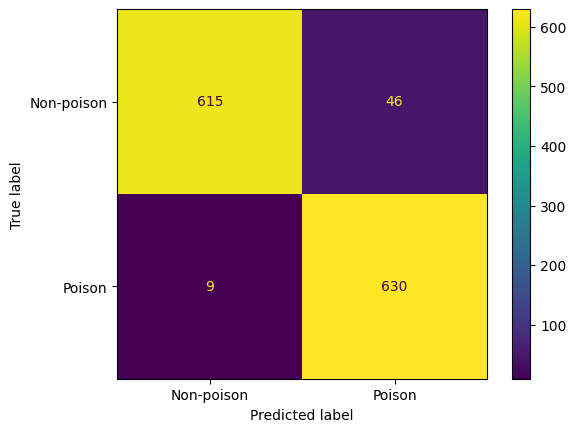

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Non-poison', 'Poison']);

In [ ]:
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                               sparse_output=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_leaf=3,
                                        min_samples_split=3))])

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_true=y_test, y_pred=pipe_dt.predict(X_test))

0.9859154929577465

# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# full pipeline: preprocessor + model
rf_pipeline = make_pipeline(OneHotEncoder(handle_unknown="infrequent_if_exist",sparse_output=False),
                            RandomForestClassifier())

# define parameter grid
param_grid_rf = {
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__class_weight': [None,'balanced', 'balanced_subsample'],
    'randomforestclassifier__criterion': ['gini','entropy','log_loss'],
    'randomforestclassifier__max_depth':[5, 10, 15, 20, None],
    'randomforestclassifier__max_features':['sqrt', 'log2, None'],
    'randomforestclassifier__n_estimators':range(1, 100, 2),
    'randomforestclassifier__n_jobs':[-1, None],
}


# define GridSearchCV
search_rf = GridSearchCV(rf_pipeline,
                      param_grid_rf,
                      cv=5,
                      verbose=1)

search_rf.fit(X_train, y_train)

scores = {"rf" : search_rf.best_score_}

scores

Fitting 5 folds for each of 18000 candidates, totalling 90000 fits


KeyboardInterrupt: 

In [ ]:
search_rf.best_params_

In [ ]:
pipe_rf = make_pipeline(
    OneHotEncoder(handle_unknown="infrequent_if_exist", sparse_output=False),
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
)

In [ ]:
pipe_rf.fit(X, y)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                               sparse_output=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=10, n_jobs=-1))])

In [ ]:
accuracy_score(pipe_rf.predict(X_test), y_test)

0.9669230769230769

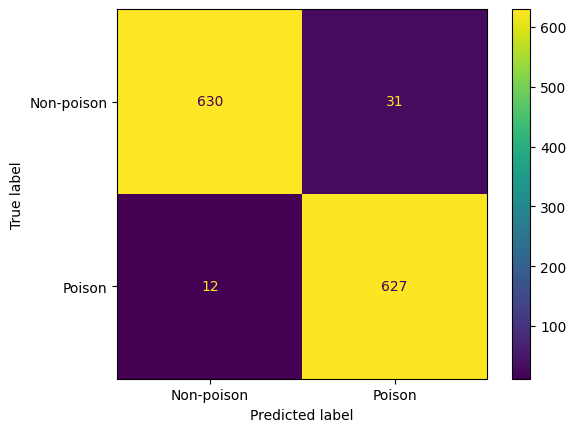

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipe_rf,
                                      X_test,
                                      y_test,
                                      display_labels=['Non-poison', 'Poison']);

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_true=y_test, y_pred=pipe_rf.predict(X_test))

0.9812206572769953

In [ ]:
rf_pred = new_data.copy()

In [ ]:
rf_pred['poisonous'] = pipe_rf.predict(new_data)

In [ ]:
rf_pred

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,poisonous
Id,,,,,,,
5165,f,w,True,w,w,v,1
4281,f,g,False,n,p,v,1
231,x,n,True,w,p,v,0
3890,f,n,False,w,w,s,0
1521,x,y,False,n,p,v,1
...,...,...,...,...,...,...,...
983,x,n,False,w,y,v,1
7055,x,e,True,p,g,v,0
7456,x,y,False,b,n,y,1


In [ ]:
rf_pred = new_data.copy()
rf_pred['poisonous'] = pipe_rf.predict(new_data)
rf_pred['poisonous'].to_csv('../content/submission_rf.csv')